<a href="https://colab.research.google.com/github/mrholmes-7/Projects/blob/master/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis 

Mount the G Drive for Downsmpled(16KHz) Dataset

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Install all required Modules

In [4]:

!pip install soundfile
import librosa
from tqdm import tqdm
import soundfile
from scipy.io import wavfile
import os, glob, pickle
import numpy as np
from scipy.fftpack import dct
import matplotlib.pyplot as plt

In [0]:
emotions={
    
    '00':'happy',
    '01':'sad',
    '02':'neutral',
    '03':'angry'
 
}

observed_emotions=['happy', 'sad', 'neutral', 'angry']

Create Pandas dataframe from the dataset

In [0]:
''' Creating a pandas dataframe for structured handling of files in the dataset '''
import pandas as pd
#Dataframe will contain 2 columns 'file' and 'emotion'
dataframe = pd.DataFrame(columns=['file', 'emotion'])

Define emotion to each of the data in dataframe

In [7]:
for file in tqdm(glob.glob("/content/gdrive/My Drive/Downsampled/*")):
  t = "/content/gdrive/My Drive/Downsampled/"
  file_name=os.path.basename(file[len(t):])
  emotion=emotions[file_name.split("_")[2]]
  if emotion not in observed_emotions:
    continue
  print(file_name,emotion)
  dataframe = dataframe.append({'file': file, 'emotion': emotion}, ignore_index=True)

  5%|▍         | 46/960 [00:00<00:04, 224.47it/s]

01_00_03_10b_2.wav angry
01_00_03_10b_1.wav angry
01_00_03_10a_2.wav angry
01_00_03_10a_1.wav angry
01_00_03_11a_1.wav angry
01_00_03_15a_1.wav angry
01_00_03_14b_2.wav angry
01_00_03_14b_1.wav angry
01_00_03_14a_2.wav angry
01_00_03_14a_1.wav angry
01_00_03_13b_2.wav angry
01_00_03_13b_1.wav angry
01_00_03_13a_2.wav angry
01_00_03_13a_1.wav angry
01_00_03_12b_2.wav angry
01_00_03_12b_1.wav angry
01_00_03_12a_2.wav angry
01_00_03_12a_1.wav angry
01_00_03_11b_2.wav angry
01_00_03_11b_1.wav angry
01_00_03_11a_2.wav angry
01_00_03_2a_1.wav angry
01_00_03_1b_2.wav angry
01_00_03_1b_1.wav angry
01_00_03_1a_2.wav angry
01_00_03_1a_1.wav angry
01_00_03_15b_2.wav angry
01_00_03_15b_1.wav angry
01_00_03_15a_2.wav angry
01_00_03_7a_1.wav angry
01_00_03_5b_2.wav angry
01_00_03_5a_1.wav angry
01_00_03_4a_1.wav angry
01_00_03_3b_2.wav angry
01_00_03_4b_1.wav angry
01_00_03_3b_1.wav angry
01_00_03_3a_1.wav angry
01_00_03_4b_2.wav angry
01_00_03_4a_2.wav angry
01_00_03_2b_2.wav angry
01_00_03_3a_2.wa

 10%|▉         | 94/960 [00:00<00:03, 231.35it/s]

angry
01_00_03_6a_1.wav angry
01_00_03_6b_2.wav angry
01_00_03_9a_2.wav angry
01_00_03_8a_1.wav angry
01_00_03_7b_2.wav angry
01_00_03_8b_2.wav angry
01_00_03_9a_1.wav angry
01_00_03_7b_1.wav angry
01_00_00_12a_1.wav happy
01_00_00_11b_1.wav happy
01_00_00_11a_1.wav happy
01_00_00_10b_1.wav happy
01_00_00_10a_1.wav happy
01_00_03_8b_1.wav angry
01_00_03_9b_2.wav angry
01_00_03_8a_2.wav angry
01_00_03_9b_1.wav angry
01_00_00_14a_2.wav happy
01_00_00_14a_1.wav happy
01_00_00_13b_2.wav happy
01_00_00_13b_1.wav happy
01_00_00_13a_2.wav happy
01_00_00_13a_1.wav happy
01_00_00_12b_2.wav happy
01_00_00_12b_1.wav happy
01_00_00_11b_2.wav happy
01_00_00_10a_2.wav happy
01_00_00_10b_2.wav happy
01_00_00_11a_2.wav happy
01_00_00_12a_2.wav happy
01_00_00_1a_1.wav happy
01_00_00_15a_1.wav happy
01_00_00_2a_1.wav happy
01_00_00_15b_2.wav happy
01_00_00_1b_2.wav happy
01_00_00_15a_2.wav happy
01_00_00_14b_2.wav happy
01_00_00_14b_1.wav happy
01_00_00_5b_1.wav happy
01_00_00_5a_1.wav happy
01_00_00_4a

 17%|█▋        | 165/960 [00:00<00:03, 232.76it/s]

 happy
01_00_00_6b_2.wav happy
01_00_00_6b_1.wav happy
01_00_00_6a_2.wav happy
01_00_00_5a_2.wav happy
01_00_00_6a_1.wav happy
01_00_00_5b_2.wav happy
01_00_02_11b_1.wav neutral
01_00_02_11a_2.wav neutral
01_00_02_11a_1.wav neutral
01_00_02_10b_2.wav neutral
01_00_02_10b_1.wav neutral
01_00_02_10a_2.wav neutral
01_00_02_11b_2.wav neutral
01_00_02_10a_1.wav neutral
01_00_00_8a_1.wav happy
01_00_00_9b_1.wav happy
01_00_00_9a_1.wav happy
01_00_00_7b_2.wav happy
01_00_00_9b_2.wav happy
01_00_00_8b_2.wav happy
01_00_00_8b_1.wav happy
01_00_02_15a_1.wav neutral
01_00_02_14b_2.wav neutral
01_00_02_14b_1.wav neutral
01_00_02_14a_2.wav neutral
01_00_02_14a_1.wav neutral
01_00_02_13b_2.wav neutral
01_00_02_13b_1.wav neutral
01_00_02_13a_2.wav neutral
01_00_02_13a_1.wav neutral
01_00_02_12b_2.wav neutral
01_00_02_12b_1.wav neutral
01_00_02_12a_2.wav neutral
01_00_02_12a_1.wav neutral
01_00_02_4b_1.wav neutral
01_00_02_4a_1.wav neutral
01_00_02_3b_2.wav neutral
01_00_02_2a_2.wav neutral
01_00_02_2

 22%|██▏       | 215/960 [00:00<00:03, 238.97it/s]

01_00_02_7a_1.wav neutral
01_00_02_6b_1.wav neutral
01_00_02_5b_2.wav neutral
01_00_02_5a_1.wav neutral
01_00_02_9b_1.wav neutral
01_00_02_9a_2.wav neutral
01_00_02_8b_2.wav neutral
01_00_02_8b_1.wav neutral
01_00_02_8a_2.wav neutral
01_00_02_8a_1.wav neutral
01_00_02_7b_2.wav neutral
01_00_02_7b_1.wav neutral
01_00_02_6b_2.wav neutral
01_00_01_11a_1.wav sad
01_00_02_9b_2.wav neutral
01_00_02_9a_1.wav neutral
01_00_01_11a_2.wav sad
01_00_01_11b_1.wav sad
01_00_01_10b_1.wav sad
01_00_01_10a_2.wav sad
01_00_01_12b_2.wav sad
01_00_01_12b_1.wav sad
01_00_01_12a_2.wav sad
01_00_01_10a_1.wav sad
01_00_01_10b_2.wav sad
01_00_01_11b_2.wav sad
01_00_01_12a_1.wav sad
01_00_01_14b_2.wav sad
01_00_01_14a_2.wav sad
01_00_01_13b_1.wav sad
01_00_01_14a_1.wav sad
01_00_01_13b_2.wav sad
01_00_01_13a_2.wav sad
01_00_01_14b_1.wav sad
01_00_01_13a_1.wav sad
01_00_01_15b_1.wav sad
01_00_01_15b_2.wav sad
01_00_01_1a_2.wav sad
01_00_01_1a_1.wav sad
01_00_01_15a_2.wav sad
01_00_01_15a_1.wav sad
01_00_01_3b_1.

 28%|██▊       | 266/960 [00:01<00:02, 241.66it/s]

sad
01_00_01_9a_1.wav sad
01_00_01_9b_2.wav sad
01_00_01_8a_2.wav sad
01_01_03_13a_1.wav angry
01_01_03_13b_1.wav angry
01_01_03_14a_2.wav angry
01_01_03_14a_1.wav angry
01_01_03_13b_2.wav angry
01_01_03_12b_1.wav angry
01_01_03_10b_1.wav angry
01_01_03_11a_1.wav angry
01_01_03_10b_2.wav angry
01_01_03_11b_2.wav angry
01_01_03_12a_2.wav angry
01_01_03_11b_1.wav angry
01_01_03_11a_2.wav angry
01_01_03_12a_1.wav angry
01_01_03_10a_2.wav angry
01_01_03_15b_1.wav angry
01_01_03_1b_1.wav angry
01_01_03_2a_1.wav angry
01_01_03_1b_2.wav angry
01_01_03_15a_2.wav angry
01_01_03_2a_2.wav angry
01_01_03_1a_1.wav angry
01_01_03_15b_2.wav angry
01_01_03_1a_2.wav angry
01_01_03_15a_1.wav angry
01_01_03_14b_2.wav angry
01_01_03_13a_2.wav angry
01_01_03_12b_2.wav angry
01_01_03_14b_1.wav angry
01_01_03_5a_1.wav angry
01_01_03_4b_1.wav angry
01_01_03_4a_1.wav angry
01_01_03_4b_2.wav angry
01_01_03_2b_2.wav angry
01_01_03_3a_2.wav angry
01_01_03_3a_1.wav angry
01_01_03_3b_1.wav angry
01_01_03_3b_2.wav a

 35%|███▌      | 339/960 [00:01<00:02, 238.14it/s]

01_01_03_5b_2.wav angry
01_01_03_6a_2.wav angry
01_01_03_5b_1.wav angry
01_01_03_6b_2.wav angry
01_01_03_7a_1.wav angry
01_01_03_5a_2.wav angry
01_01_03_7a_2.wav angry
01_01_00_11a_2.wav happy
01_01_00_10a_2.wav happy
01_01_00_10a_1.wav happy
01_01_03_8a_1.wav angry
01_01_03_7b_2.wav angry
01_01_03_9b_2.wav angry
01_01_03_9b_1.wav angry
01_01_03_9a_1.wav angry
01_01_03_8b_2.wav angry
01_01_00_13b_1.wav happy
01_01_00_13a_1.wav happy
01_01_00_12b_2.wav happy
01_01_00_12b_1.wav happy
01_01_00_10b_1.wav happy
01_01_00_10b_2.wav happy
01_01_00_11b_2.wav happy
01_01_00_11b_1.wav happy
01_01_00_11a_1.wav happy
01_01_00_12a_1.wav happy
01_01_00_12a_2.wav happy
01_01_00_1a_2.wav happy
01_01_00_1a_1.wav happy
01_01_00_15b_1.wav happy
01_01_00_15a_2.wav happy
01_01_00_14b_1.wav happy
01_01_00_13a_2.wav happy
01_01_00_13b_2.wav happy
01_01_00_14a_2.wav happy
01_01_00_14b_2.wav happy
01_01_00_14a_1.wav happy
01_01_00_6a_1.wav happy
01_01_00_5a_1.wav happy
01_01_00_4a_2.wav happy
01_01_00_4a_1.wav 

 43%|████▎     | 415/960 [00:01<00:02, 232.39it/s]

01_01_00_2a_1.wav happy
01_01_00_1b_2.wav happy
01_01_00_1b_1.wav happy
01_01_02_11b_1.wav neutral
01_01_02_11a_1.wav neutral
01_01_02_10a_2.wav neutral
01_01_02_10a_1.wav neutral
01_01_00_9a_1.wav happy
01_01_00_8b_2.wav happy
01_01_00_8a_2.wav happy
01_01_00_9b_2.wav happy
01_01_00_9b_1.wav happy
01_01_00_9a_2.wav happy
01_01_00_8b_1.wav happy
01_01_00_8a_1.wav happy
01_01_00_7b_2.wav happy
01_01_00_7b_1.wav happy
01_01_00_5b_1.wav happy
01_01_00_5a_2.wav happy
01_01_00_7a_2.wav happy
01_01_00_5b_2.wav happy
01_01_00_6b_2.wav happy
01_01_00_7a_1.wav happy
01_01_00_6b_1.wav happy
01_01_00_6a_2.wav happy
01_01_02_1b_1.wav neutral
01_01_02_15b_2.wav neutral
01_01_02_2a_2.wav neutral
01_01_02_1b_2.wav neutral
01_01_02_1a_1.wav neutral
01_01_02_14b_2.wav neutral
01_01_02_14a_1.wav neutral
01_01_02_14a_2.wav neutral
01_01_02_14b_1.wav neutral
01_01_02_13b_2.wav neutral
01_01_02_13b_1.wav neutral
01_01_02_13a_2.wav neutral
01_01_02_13a_1.wav neutral
01_01_02_12b_2.wav neutral
01_01_02_12b_1

 51%|█████     | 490/960 [00:02<00:02, 231.30it/s]

01_01_02_9a_1.wav neutral
01_01_02_8b_2.wav neutral
01_01_02_8b_1.wav neutral
01_01_02_8a_2.wav neutral
01_01_02_7b_2.wav neutral
01_01_02_7b_1.wav neutral
01_01_01_13b_1.wav sad
01_01_01_13a_1.wav sad
01_01_01_12b_2.wav sad
01_01_01_10a_1.wav sad
01_01_01_12a_2.wav sad
01_01_01_12a_1.wav sad
01_01_01_15b_1.wav sad
01_01_01_15a_2.wav sad
01_01_01_14b_2.wav sad
01_01_01_13a_2.wav sad
01_01_01_12b_1.wav sad
01_01_01_14b_1.wav sad
01_01_01_14a_2.wav sad
01_01_01_14a_1.wav sad
01_01_01_13b_2.wav sad
01_01_01_2a_1.wav sad
01_01_01_15a_1.wav sad
01_01_01_1b_2.wav sad
01_01_01_1b_1.wav sad
01_01_01_1a_1.wav sad
01_01_01_1a_2.wav sad
01_01_01_2b_2.wav sad
01_01_01_2b_1.wav sad
01_01_01_15b_2.wav sad
01_01_01_2a_2.wav sad
01_01_01_3b_2.wav sad
01_01_01_3b_1.wav sad
01_01_01_4b_2.wav sad
01_01_01_3a_2.wav sad
01_01_01_3a_1.wav sad
01_01_01_5b_2.wav sad
01_01_01_5a_2.wav sad
01_01_01_5a_1.wav sad
01_01_01_4a_2.wav sad
01_01_01_4a_1.wav sad
01_01_01_4b_1.wav sad
01_01_01_7a_2.wav sad
01_01_01_7a_1

 59%|█████▉    | 564/960 [00:02<00:01, 237.70it/s]

00_00_03_11a_1.wav angry
00_00_03_12a_2.wav angry
00_00_03_11b_1.wav angry
00_00_03_10a_2.wav angry
00_00_03_10a_1.wav angry
00_00_03_2a_1.wav angry
00_00_03_1a_1.wav angry
00_00_03_15b_1.wav angry
00_00_03_2a_2.wav angry
00_00_03_15a_2.wav angry
00_00_03_1b_1.wav angry
00_00_03_1a_2.wav angry
00_00_03_15b_2.wav angry
00_00_03_1b_2.wav angry
00_00_03_15a_1.wav angry
00_00_03_14a_1.wav angry
00_00_03_14b_2.wav angry
00_00_03_14b_1.wav angry
00_00_03_14a_2.wav angry
00_00_03_13b_2.wav angry
00_00_03_7a_1.wav angry
00_00_03_6a_1.wav angry
00_00_03_5b_1.wav angry
00_00_03_5a_2.wav angry
00_00_03_7a_2.wav angry
00_00_03_6a_2.wav angry
00_00_03_6b_2.wav angry
00_00_03_6b_1.wav angry
00_00_03_5b_2.wav angry
00_00_03_5a_1.wav angry
00_00_03_4b_1.wav angry
00_00_03_3a_1.wav angry
00_00_03_3b_1.wav angry
00_00_03_4a_1.wav angry
00_00_03_4b_2.wav angry
00_00_03_4a_2.wav angry
00_00_03_3b_2.wav angry
00_00_03_3a_2.wav angry
00_00_03_2b_2.wav angry
00_00_03_2b_1.wav angry
00_00_00_12b_2.wav happy
0

 64%|██████▍   | 612/960 [00:02<00:01, 230.88it/s]

00_00_00_13a_2.wav happy
00_00_00_14a_1.wav happy
00_00_00_5a_1.wav happy
00_00_00_4b_2.wav happy
00_00_00_4b_1.wav happy
00_00_00_4a_2.wav happy
00_00_00_4a_1.wav happy
00_00_00_3a_1.wav happy
00_00_00_3a_2.wav happy
00_00_00_3b_2.wav happy
00_00_00_2b_2.wav happy
00_00_00_3b_1.wav happy
00_00_00_2b_1.wav happy
00_00_00_1a_2.wav happy
00_00_00_1b_1.wav happy
00_00_00_2a_1.wav happy
00_00_00_2a_2.wav happy
00_00_00_9a_2.wav happy
00_00_00_9a_1.wav happy
00_00_00_8b_2.wav happy
00_00_00_8b_1.wav happy
00_00_00_8a_2.wav happy
00_00_00_8a_1.wav happy
00_00_00_7b_2.wav happy
00_00_00_7b_1.wav happy
00_00_00_7a_2.wav happy
00_00_00_6a_1.wav happy
00_00_00_6b_1.wav happy
00_00_00_6a_2.wav happy
00_00_00_5b_2.wav happy
00_00_00_7a_1.wav happy
00_00_00_6b_2.wav happy
00_00_00_5a_2.wav happy
00_00_00_5b_1.wav happy
00_00_02_12b_1.wav neutral
00_00_02_10b_2.wav neutral
00_00_02_12a_2.wav neutral
00_00_02_12a_1.wav neutral
00_00_02_11b_2.wav neutral
00_00_02_11b_1.wav neutral
00_00_02_11a_2.wav n

 69%|██████▉   | 660/960 [00:02<00:01, 224.53it/s]

00_00_02_14b_2.wav neutral
00_00_02_14a_1.wav neutral
00_00_02_13b_2.wav neutral
00_00_02_13b_1.wav neutral
00_00_02_13a_2.wav neutral
00_00_02_4a_1.wav neutral
00_00_02_4b_2.wav neutral
00_00_02_4b_1.wav neutral
00_00_02_4a_2.wav neutral
00_00_02_3b_1.wav neutral
00_00_02_3b_2.wav neutral
00_00_02_3a_2.wav neutral
00_00_02_3a_1.wav neutral
00_00_02_2b_2.wav neutral
00_00_02_2b_1.wav neutral
00_00_02_15b_2.wav neutral
00_00_02_2a_2.wav neutral
00_00_02_2a_1.wav neutral
00_00_02_8a_1.wav neutral
00_00_02_7b_2.wav neutral
00_00_02_7b_1.wav neutral
00_00_02_5b_2.wav neutral
00_00_02_5b_1.wav neutral
00_00_02_5a_2.wav neutral
00_00_02_6b_1.wav neutral
00_00_02_5a_1.wav neutral
00_00_02_6a_2.wav neutral
00_00_02_6a_1.wav neutral
00_00_02_6b_2.wav neutral
00_00_02_7a_2.wav neutral
00_00_02_7a_1.wav neutral
00_00_01_11b_1.wav sad
00_00_01_11a_2.wav sad
00_00_01_11a_1.wav sad
00_00_01_12a_2.wav sad
00_00_01_10b_2.wav sad
00_00_01_10b_1.wav sad
00_00_01_10a_2.wav sad
00_00_01_10a_1.wav sad
00_0

 76%|███████▌  | 731/960 [00:03<00:01, 225.28it/s]


00_00_01_1a_2.wav sad
00_00_01_1b_2.wav sad
00_00_01_15b_2.wav sad
00_00_01_15b_1.wav sad
00_00_01_15a_2.wav sad
00_00_01_15a_1.wav sad
00_00_01_14a_1.wav sad
00_00_01_4b_2.wav sad
00_00_01_4a_2.wav sad
00_00_01_4b_1.wav sad
00_00_01_3b_1.wav sad
00_00_01_4a_1.wav sad
00_00_01_3b_2.wav sad
00_00_01_3a_2.wav sad
00_00_01_3a_1.wav sad
00_00_01_2b_2.wav sad
00_00_01_2b_1.wav sad
00_00_01_1a_1.wav sad
00_00_01_9b_1.wav sad
00_00_01_9a_2.wav sad
00_00_01_7b_2.wav sad
00_00_01_7b_1.wav sad
00_00_01_7a_2.wav sad
00_00_01_7a_1.wav sad
00_00_01_6a_1.wav sad
00_00_01_5a_1.wav sad
00_00_01_6b_2.wav sad
00_00_01_6a_2.wav sad
00_00_01_6b_1.wav sad
00_00_01_5b_2.wav sad
00_00_01_5a_2.wav sad
00_00_01_5b_1.wav sad
00_01_03_12a_1.wav angry
00_01_03_10b_2.wav angry
00_01_03_10b_1.wav angry
00_01_03_11a_2.wav angry
00_01_03_11b_1.wav angry
00_01_03_12a_2.wav angry
00_01_03_11b_2.wav angry
00_01_03_11a_1.wav angry
00_01_03_10a_1.wav angry
00_01_03_10a_2.wav angry
00_00_01_9a_1.wav sad
00_00_01_8a_1.wav 

 84%|████████▍ | 807/960 [00:03<00:00, 236.98it/s]

00_01_03_1a_1.wav angry
00_01_03_2a_2.wav angry
00_01_03_2a_1.wav angry
00_01_03_1b_2.wav angry
00_01_03_1b_1.wav angry
00_01_03_1a_2.wav angry
00_01_03_15b_2.wav angry
00_01_03_15b_1.wav angry
00_01_03_15a_2.wav angry
00_01_03_15a_1.wav angry
00_01_03_14b_1.wav angry
00_01_03_14b_2.wav angry
00_01_03_14a_2.wav angry
00_01_03_13a_1.wav angry
00_01_03_14a_1.wav angry
00_01_03_13b_1.wav angry
00_01_03_13b_2.wav angry
00_01_03_13a_2.wav angry
00_01_03_12b_2.wav angry
00_01_03_12b_1.wav angry
00_01_03_3b_1.wav angry
00_01_03_4a_1.wav angry
00_01_03_4b_2.wav angry
00_01_03_3a_1.wav angry
00_01_03_2b_1.wav angry
00_01_03_4b_1.wav angry
00_01_03_4a_2.wav angry
00_01_03_3b_2.wav angry
00_01_03_3a_2.wav angry
00_01_03_9b_1.wav angry
00_01_03_7b_2.wav angry
00_01_03_8a_2.wav angry
00_01_03_8a_1.wav angry
00_01_03_9a_2.wav angry
00_01_03_8b_1.wav angry
00_01_03_8b_2.wav angry
00_01_03_9a_1.wav angry
00_01_03_7b_1.wav angry
00_01_03_9b_2.wav angry
00_01_03_5a_1.wav angry
00_01_03_6b_1.wav angry
00

 92%|█████████▏| 880/960 [00:03<00:00, 233.86it/s]

00_01_00_3a_2.wav happy
00_01_00_3a_1.wav happy
00_01_00_2b_1.wav happy
00_01_00_15b_2.wav happy
00_01_00_15a_1.wav happy
00_01_00_1a_1.wav happy
00_01_00_2a_2.wav happy
00_01_00_1b_2.wav happy
00_01_00_1b_1.wav happy
00_01_00_1a_2.wav happy
00_01_00_2a_1.wav happy
00_01_00_15b_1.wav happy
00_01_00_15a_2.wav happy
00_01_02_10a_2.wav neutral
00_01_02_10a_1.wav neutral
00_01_02_11a_2.wav neutral
00_01_02_11a_1.wav neutral
00_01_00_9a_2.wav happy
00_01_00_8b_1.wav happy
00_01_00_9a_1.wav happy
00_01_00_9b_2.wav happy
00_01_00_8a_2.wav happy
00_01_00_7b_1.wav happy
00_01_00_8b_2.wav happy
00_01_00_9b_1.wav happy
00_01_00_8a_1.wav happy
00_01_00_7b_2.wav happy
00_01_00_7a_2.wav happy
00_01_00_7a_1.wav happy
00_01_00_6b_2.wav happy
00_01_00_6b_1.wav happy
00_01_00_6a_2.wav happy
00_01_00_6a_1.wav happy
00_01_00_5b_2.wav happy
00_01_00_5b_1.wav happy
00_01_00_5a_2.wav happy
00_01_00_5a_1.wav happy
00_01_02_2a_2.wav neutral
00_01_02_2a_1.wav neutral
00_01_02_1b_2.wav neutral
00_01_02_1b_1.wav 

 97%|█████████▋| 929/960 [00:04<00:00, 219.23it/s]

00_01_02_2b_1.wav neutral
00_01_02_3a_2.wav neutral
00_01_02_3a_1.wav neutral
00_01_02_15b_2.wav neutral
00_01_02_1a_1.wav neutral
00_01_01_11a_2.wav sad
00_01_01_10a_1.wav sad
00_01_01_10b_2.wav sad
00_01_01_11b_1.wav sad
00_01_01_12a_1.wav sad
00_01_01_10b_1.wav sad
00_01_01_10a_2.wav sad
00_01_02_9b_1.wav neutral
00_01_02_9a_2.wav neutral
00_01_02_7b_1.wav neutral
00_01_02_9b_2.wav neutral
00_01_02_9a_1.wav neutral
00_01_02_8b_2.wav neutral
00_01_02_8b_1.wav neutral
00_01_02_8a_2.wav neutral
00_01_02_8a_1.wav neutral
00_01_02_7b_2.wav neutral
00_01_02_7a_1.wav neutral
00_01_02_5b_2.wav neutral
00_01_02_7a_2.wav neutral
00_01_02_6b_2.wav neutral
00_01_02_6b_1.wav neutral
00_01_01_2a_2.wav sad
00_01_01_1b_2.wav sad
00_01_01_15b_2.wav sad
00_01_01_15b_1.wav sad
00_01_01_15a_1.wav sad
00_01_01_1a_1.wav sad
00_01_01_2a_1.wav sad
00_01_01_15a_2.wav sad
00_01_01_1b_1.wav sad
00_01_01_1a_2.wav sad
00_01_01_13b_1.wav sad
00_01_01_13b_2.wav sad
00_01_01_12b_1.wav sad
00_01_01_14b_2.wav sad
00

100%|██████████| 960/960 [00:04<00:00, 230.87it/s]

00_01_01_8a_2.wav sad
00_01_01_8b_2.wav sad
00_01_01_8b_1.wav sad
00_01_01_9b_2.wav sad
00_01_01_9b_1.wav sad
00_01_01_8a_1.wav sad
00_01_01_9a_2.wav sad
00_01_01_9a_1.wav sad
00_01_01_7b_1.wav sad
00_01_01_7b_2.wav sad


Split the dataset (960) in the ratio 0.1 (Training [864],Testing[96])

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataframe, test_size=0.1)

In [9]:
print(train)

                                                  file  emotion
738  /content/gdrive/My Drive/Downsampled/00_01_03_...    angry
691  /content/gdrive/My Drive/Downsampled/00_00_01_...      sad
827  /content/gdrive/My Drive/Downsampled/00_01_00_...    happy
132  /content/gdrive/My Drive/Downsampled/01_00_02_...  neutral
649  /content/gdrive/My Drive/Downsampled/00_00_02_...  neutral
..                                                 ...      ...
129  /content/gdrive/My Drive/Downsampled/01_00_02_...  neutral
436  /content/gdrive/My Drive/Downsampled/01_01_01_...      sad
831  /content/gdrive/My Drive/Downsampled/00_01_00_...    happy
5    /content/gdrive/My Drive/Downsampled/01_00_03_...    angry
714  /content/gdrive/My Drive/Downsampled/00_01_03_...    angry

[864 rows x 2 columns]


Prepare training set

In [10]:
x_train = []
y_train = []
for index,row in tqdm(train.iterrows()):
        file = row['file']
        emotion = row['emotion']
        #print(file,emotion)
        
        with soundfile.SoundFile(file) as sound_file:
            signal = sound_file.read(dtype="float32")
            #print(signal)
            sample_rate=sound_file.samplerate
            #print(sample_rate)
            mfcc = librosa.feature.mfcc(signal, sample_rate , n_mfcc = 40)
            z = np.zeros((40,120))
            z[:mfcc.shape[0],:mfcc.shape[1]] = mfcc
            x_train.append(z)
            y_train.append(emotion)
     

864it [08:52,  1.62it/s]


Prepare Testing set

In [11]:
x_test = []
y_test = []
c= 0
for index,row in tqdm(test.iterrows()):
        file = row['file']
        emotion = row['emotion']
        with soundfile.SoundFile(file) as sound_file:
            signal = sound_file.read(dtype="float32")
            sample_rate=sound_file.samplerate
            mfcc = np.array(librosa.feature.mfcc(signal, sample_rate , n_mfcc = 40))
            c+=1
            z = np.zeros((40,120))
            z[:mfcc.shape[0],:mfcc.shape[1]] = mfcc
            x_test.append(z)
            y_test.append(emotion)
print(c)

96it [00:54,  1.76it/s]

96


In [12]:
print(len(x_train))
#for i in range(0,len(x_train)):
  #print(len(x_train[i]))

864


Convert all sets to numpy arrays

In [13]:
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_test.shape)
print(x_train.shape)

(96, 40, 120)
(864, 40, 120)


Label Encoding for categorical output

In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [15]:
label = LabelEncoder()
y_train = np_utils.to_categorical(label.fit_transform(y_train))
y_test = np_utils.to_categorical(label.fit_transform(y_test))
print('x_train shape = ',x_train.shape)
print('y_train shape = ',y_train.shape)
print('x_test shape = ',x_test.shape)
print('y_test shape = ',y_test.shape)

x_train shape =  (864, 40, 120)
y_train shape =  (864, 4)
x_test shape =  (96, 40, 120)
y_test shape =  (96, 4)


Importing packages to develop DNN and defining dimensions

In [0]:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 120
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = 4
filter_size = 2


Develop the model

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))

Define the LR of Optimizer and compile the model

In [165]:
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 39, 119, 16)       80        
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 19, 59, 16)        0         
_________________________________________________________________
dropout_105 (Dropout)        (None, 19, 59, 16)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 18, 58, 32)        2080      
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 9, 29, 32)         0         
_________________________________________________________________
dropout_106 (Dropout)        (None, 9, 29, 32)         0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 8, 28, 64)       

Train the model

In [166]:
final = model.fit(x_train, y_train, epochs=500, verbose=1, batch_size=16, validation_split=0.1)

Train on 777 samples, validate on 87 samples
Epoch 1/500
777/777 [==============================] - 1s 1ms/step - loss: 4.7207 - accuracy: 0.2728 - val_loss: 1.5643 - val_accuracy: 0.3103
Epoch 2/500
777/777 [==============================] - 1s 675us/step - loss: 3.3034 - accuracy: 0.3179 - val_loss: 2.1081 - val_accuracy: 0.2644
Epoch 3/500
777/777 [==============================] - 1s 677us/step - loss: 2.6562 - accuracy: 0.3269 - val_loss: 1.4500 - val_accuracy: 0.3908
Epoch 4/500
777/777 [==============================] - 1s 696us/step - loss: 2.3577 - accuracy: 0.3604 - val_loss: 1.1507 - val_accuracy: 0.4598
Epoch 5/500
777/777 [==============================] - 1s 695us/step - loss: 1.8997 - accuracy: 0.4131 - val_loss: 1.1388 - val_accuracy: 0.4483
Epoch 6/500
777/777 [==============================] - 1s 681us/step - loss: 1.6054 - accuracy: 0.4427 - val_loss: 1.1391 - val_accuracy: 0.4483
Epoch 7/500
777/777 [==============================] - 1s 672us/step - loss: 1.5811 - a

Finding Testing Accuracy of the model

In [168]:
test_loss,test_accuracy = model.evaluate(x_test, y_test)
print('Testing accuracy is :',test_accuracy*100,'%')

96/96 [==============================] - 0s 196us/step
Testing accuracy is : 93.75 %


Plotting the performance of the model

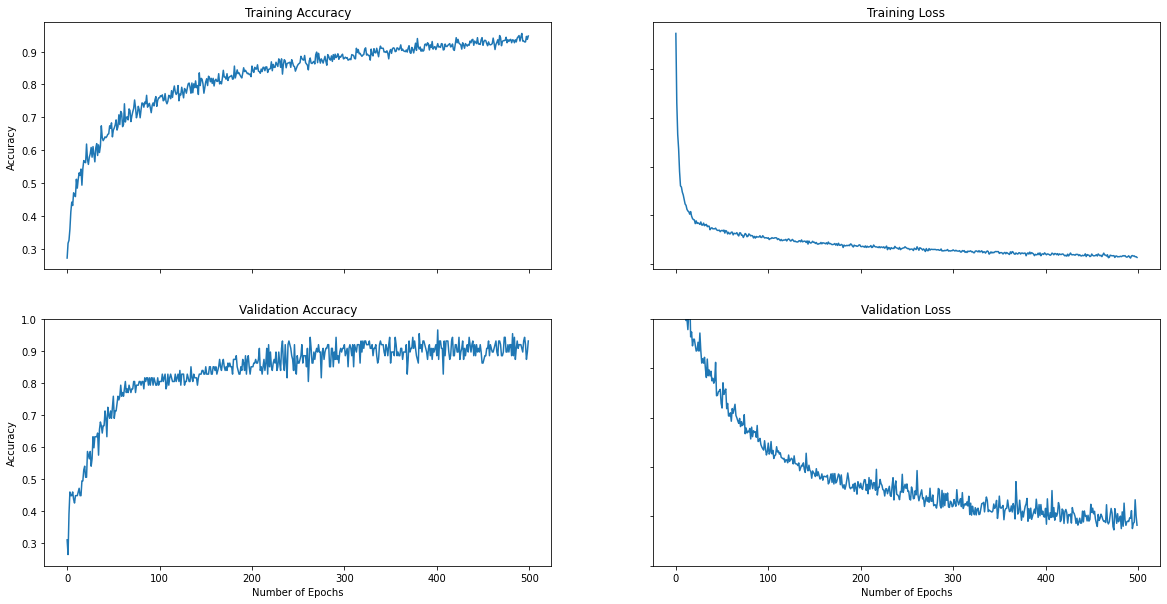

In [169]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0, 0].plot(final.history['accuracy'], 'tab:blue')
axs[0, 0].set_title('Training Accuracy')
axs[0, 1].plot(final.history['loss'], 'tab:blue')
axs[0, 1].set_title('Training Loss')
axs[1, 0].plot(final.history['val_accuracy'], 'tab:blue')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 1].plot(final.history['val_loss'], 'tab:blue')
axs[1, 1].set_title('Validation Loss')

for ax in axs.flat:
    ax.set(xlabel='Number of Epochs', ylabel='Accuracy')
plt.ylim(0,1)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Comparison of predicted emotions with true emotions of testing set

In [170]:
compare_data = pd.DataFrame(columns=['File', 'Original Emotion', 'Predicted Emotion'])
score = 0
for index,row in tqdm(test.iterrows()):
        file = row['file']
        emotion = row['emotion']
        with soundfile.SoundFile(file) as sound_file:
            signal = sound_file.read(dtype="float32")
            sample_rate=sound_file.samplerate
            
            mfcc = librosa.feature.mfcc(signal, sample_rate , n_mfcc = 40)
            z = np.zeros((40,120))
            z[:mfcc.shape[0],:mfcc.shape[1]] = mfcc
            result = model.predict_classes(z.reshape(1,40,120,1))
            #print(label.inverse_transform(result)[0])
            compare_data = compare_data.append({'File': file[-14:], 'Original Emotion': emotion ,'Predicted Emotion':label.inverse_transform(result)[0] }, ignore_index=True)
            #print( file, emotion,label.inverse_transform(result)[0] )
            if(emotion==label.inverse_transform(result)[0]):
              score+=1
print(compare_data.sample(10))


96it [00:02, 40.97it/s]

              File Original Emotion Predicted Emotion
43  00_01_5a_1.wav              sad               sad
89  01_00_1a_1.wav            happy             happy
78  01_00_8a_2.wav            happy             happy
93  1_02_14b_2.wav          neutral           neutral
53  1_02_11a_1.wav          neutral           neutral
3   00_02_7a_1.wav          neutral           neutral
71  0_01_13a_1.wav              sad               sad
31  00_00_1a_2.wav            happy             happy
74  0_03_13a_2.wav            angry             angry
63  0_02_15a_1.wav          neutral           neutral


Confusion Matrix Under Progress(If possible try it out XD)

In [173]:
import sklearn.metrics as metrics

y_pred_ohe = model.predict(x_test)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

confusion_matrix = metrics.confusion_matrix(y_true=emotions.indexOf(compare_data['Original Emotion']), y_pred=y_pred_labels) 
print(confusion_matrix)

ValueError: ignored